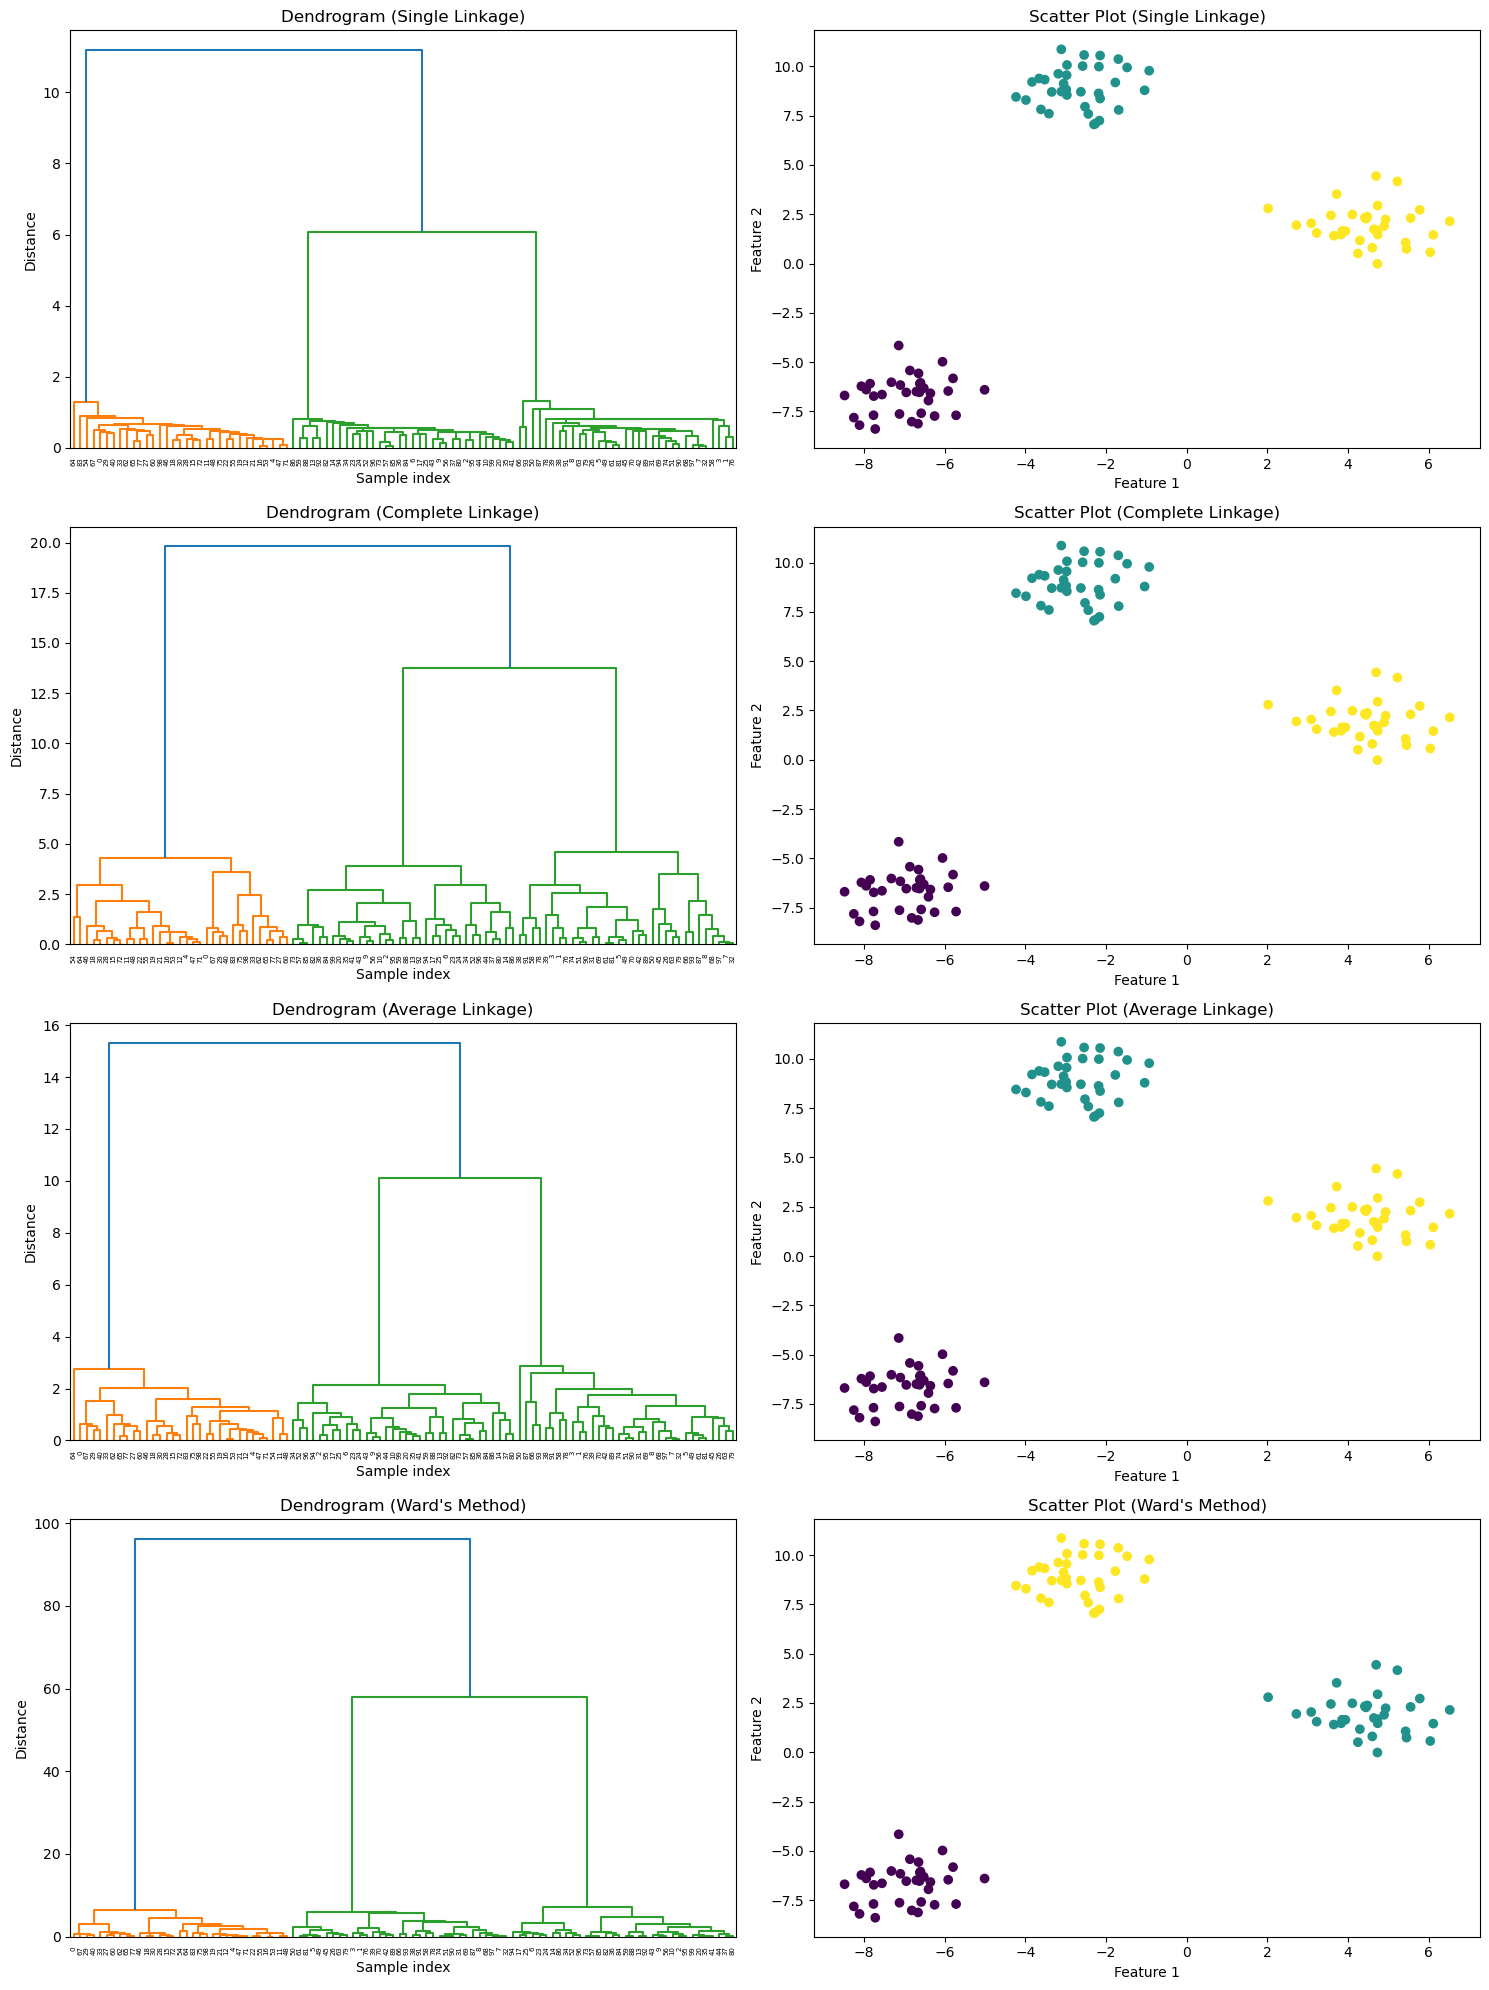

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2)

# Define linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
method_names = ['Single Linkage', 'Complete Linkage', 'Average Linkage', "Ward's Method"]

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    Z = linkage(X, method=method)
    
    # Plot the dendrogram
    ax_dendro = axes[i, 0]
    dendrogram(Z, ax=ax_dendro)
    ax_dendro.set_title(f'Dendrogram ({method_names[i]})')
    ax_dendro.set_xlabel('Sample index')
    ax_dendro.set_ylabel('Distance')
    
    # Determine clusters based on a cut-off
    clusters = fcluster(Z, 3, criterion='maxclust')  # Specify number of clusters
    
    # Plot the scatter plot of the clusters
    ax_scatter = axes[i, 1]
    ax_scatter.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    ax_scatter.set_title(f'Scatter Plot ({method_names[i]})')
    ax_scatter.set_xlabel('Feature 1')
    ax_scatter.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


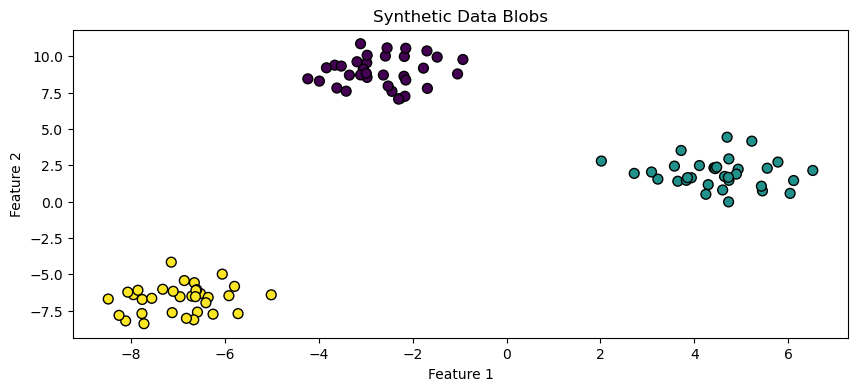

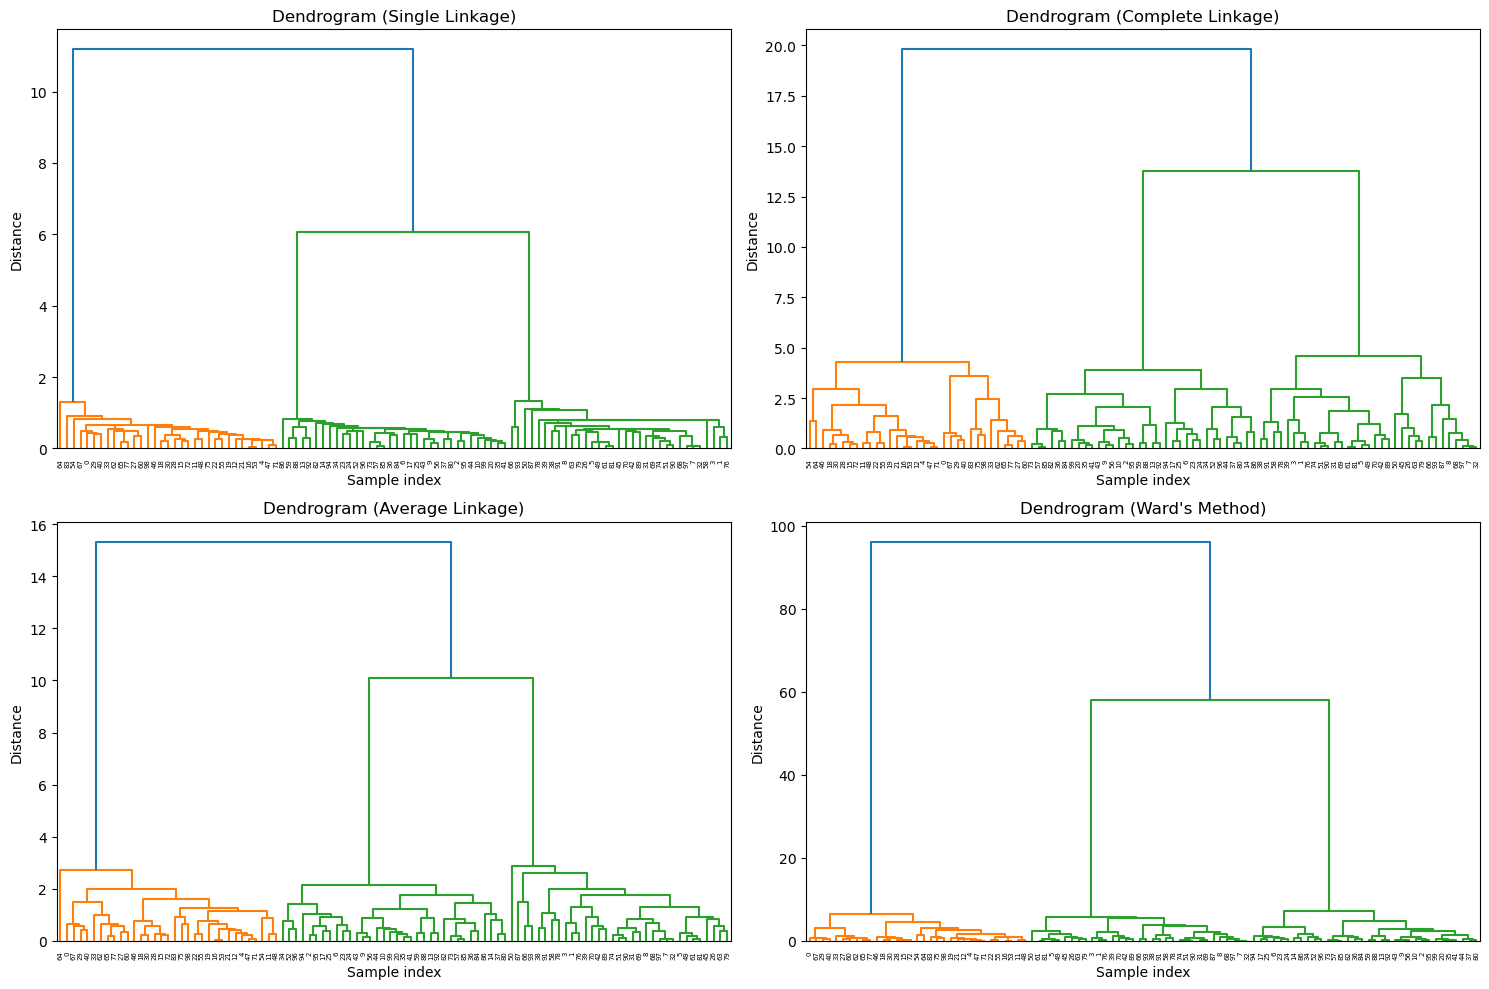

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, y = make_blobs(n_samples=100, centers=3, n_features=2)


# Plot the blobs
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Synthetic Data Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Define linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
method_names = ['Single Linkage', 'Complete Linkage', 'Average Linkage', "Ward's Method"]

plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods):
    Z = linkage(X, method=method)
    
    plt.subplot(2, 2, i+1)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method_names[i]})')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


C:\Users\Upendra\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


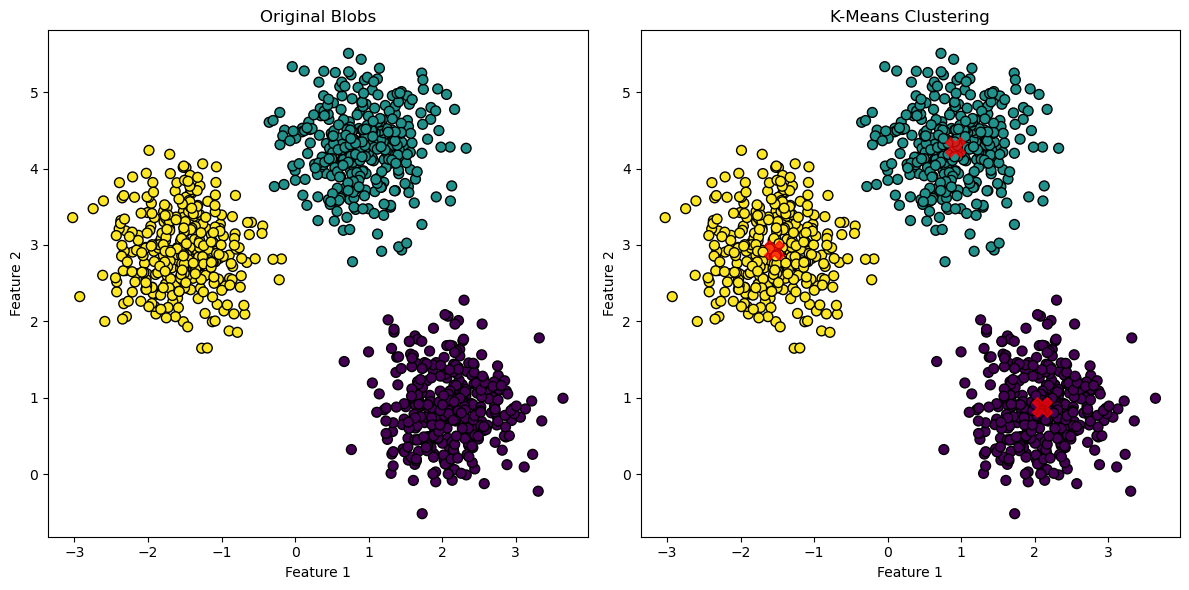

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, centers=3, cluster_std=0.5, random_state=0)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

# Plot the original blobs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Original Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the K-Means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


## Single linkage with outliers

C:\Users\Upendra\AppData\Local\Temp\ipykernel_29044\697263302.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red


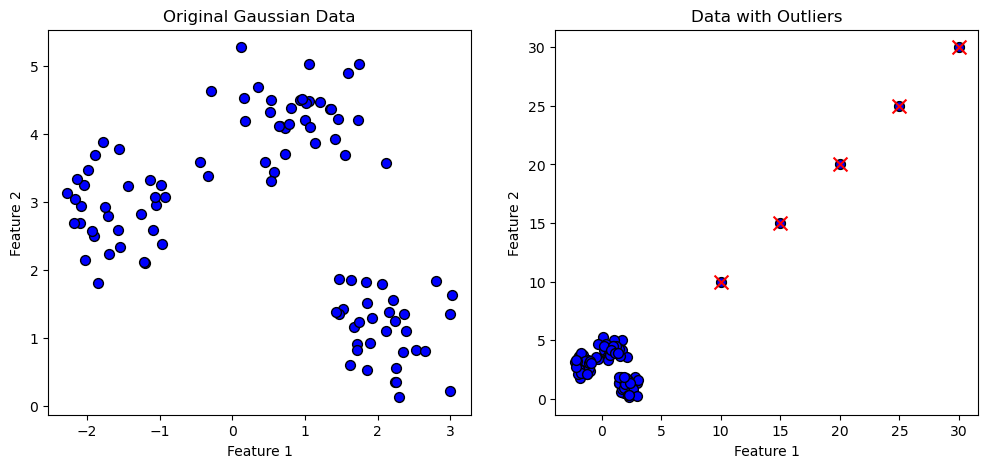

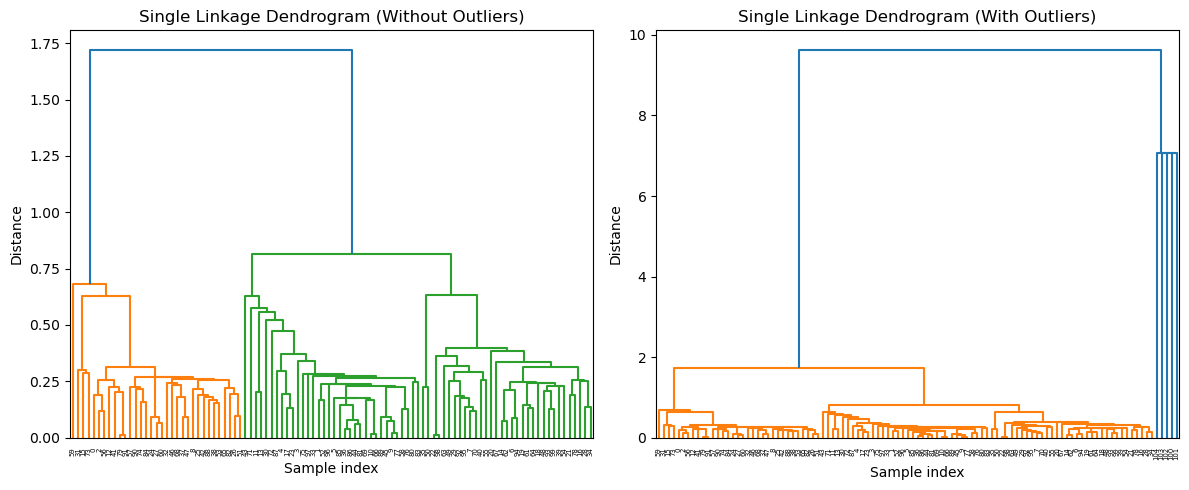

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate Gaussian distributed data (blobs)
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.5, random_state=0)

# Plot the original blobs data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Original Gaussian Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add outliers to the data
outliers = np.array([[10, 10], [15, 15], [20, 20], [25, 25], [30, 30]])
X_with_outliers = np.vstack([X, outliers])

# Plot the data with outliers
plt.subplot(1, 2, 2)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red
plt.title('Data with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Perform single linkage hierarchical clustering without outliers
Z_without_outliers = linkage(X, method='single')

# Perform single linkage hierarchical clustering with outliers
Z_with_outliers = linkage(X_with_outliers, method='single')

# Plot dendrograms
plt.figure(figsize=(12, 5))

# Dendrogram without outliers
plt.subplot(1, 2, 1)
dendrogram(Z_without_outliers)
plt.title('Single Linkage Dendrogram (Without Outliers)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Dendrogram with outliers
plt.subplot(1, 2, 2)
dendrogram(Z_with_outliers)
plt.title('Single Linkage Dendrogram (With Outliers)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


C:\Users\Upendra\AppData\Local\Temp\ipykernel_29044\2784053117.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red


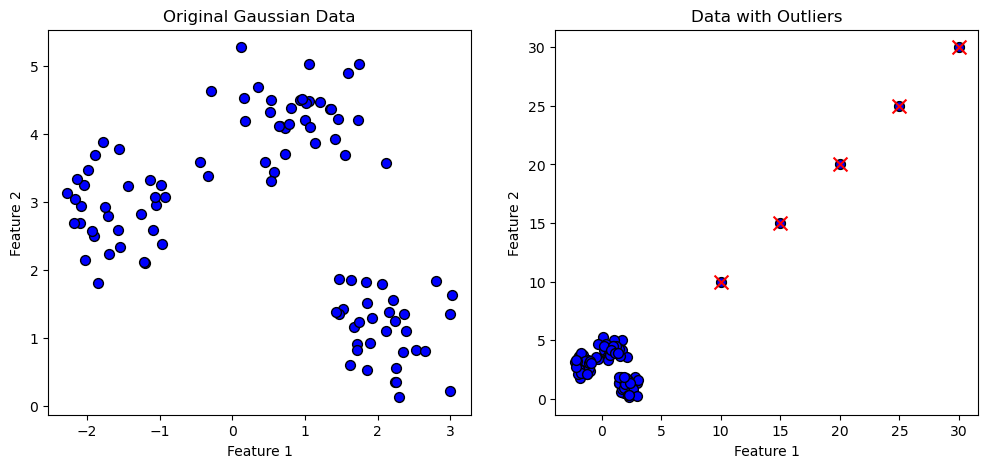

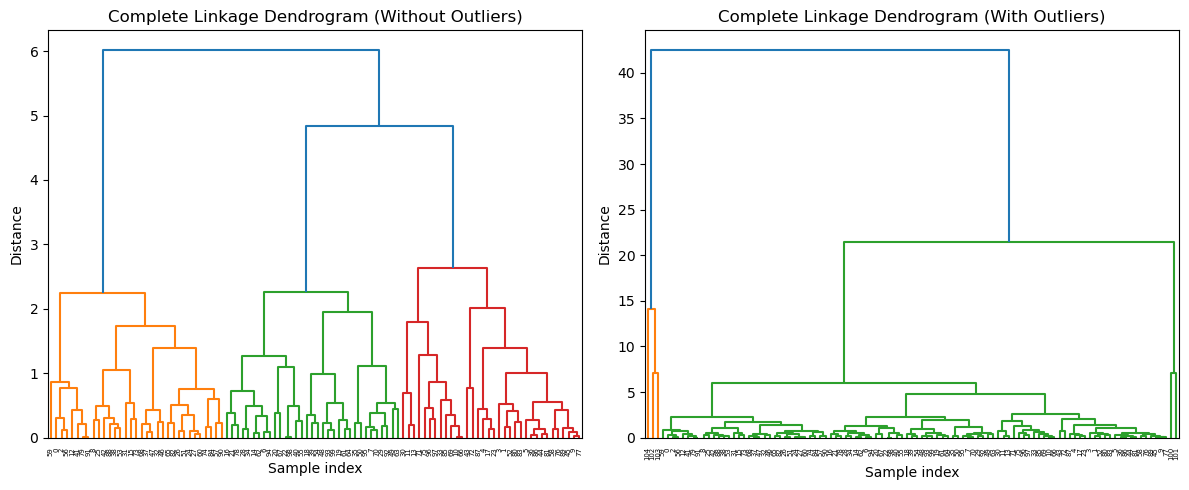

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate Gaussian distributed data (blobs)
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.5, random_state=0)

# Plot the original blobs data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Original Gaussian Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add outliers to the data
outliers = np.array([[10, 10], [15, 15], [20, 20], [25, 25], [30, 30]])
X_with_outliers = np.vstack([X, outliers])

# Plot the data with outliers
plt.subplot(1, 2, 2)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red
plt.title('Data with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Perform complete linkage hierarchical clustering without outliers
Z_without_outliers = linkage(X, method='complete')

# Perform complete linkage hierarchical clustering with outliers
Z_with_outliers = linkage(X_with_outliers, method='complete')

# Plot dendrograms
plt.figure(figsize=(12, 5))

# Dendrogram without outliers
plt.subplot(1, 2, 1)
dendrogram(Z_without_outliers)
plt.title('Complete Linkage Dendrogram (Without Outliers)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Dendrogram with outliers
plt.subplot(1, 2, 2)
dendrogram(Z_with_outliers)
plt.title('Complete Linkage Dendrogram (With Outliers)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


# avegage linkage

C:\Users\Upendra\AppData\Local\Temp\ipykernel_29044\1819479184.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red


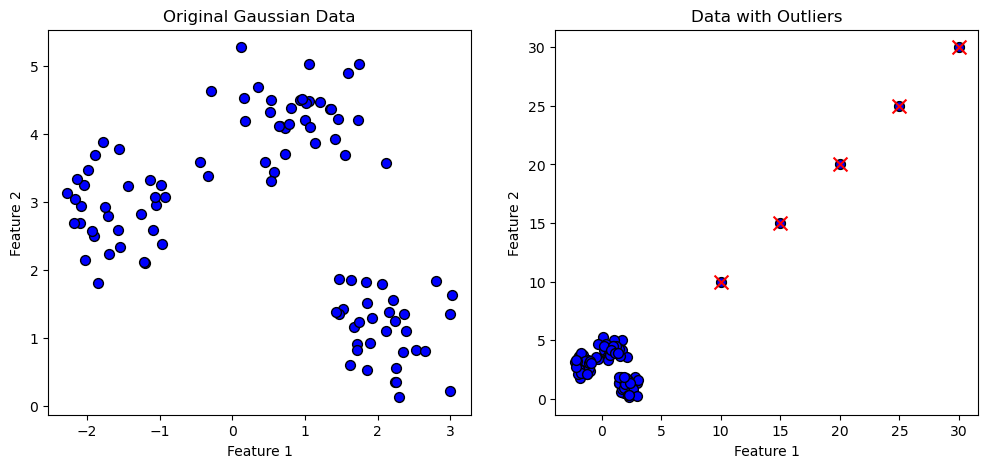

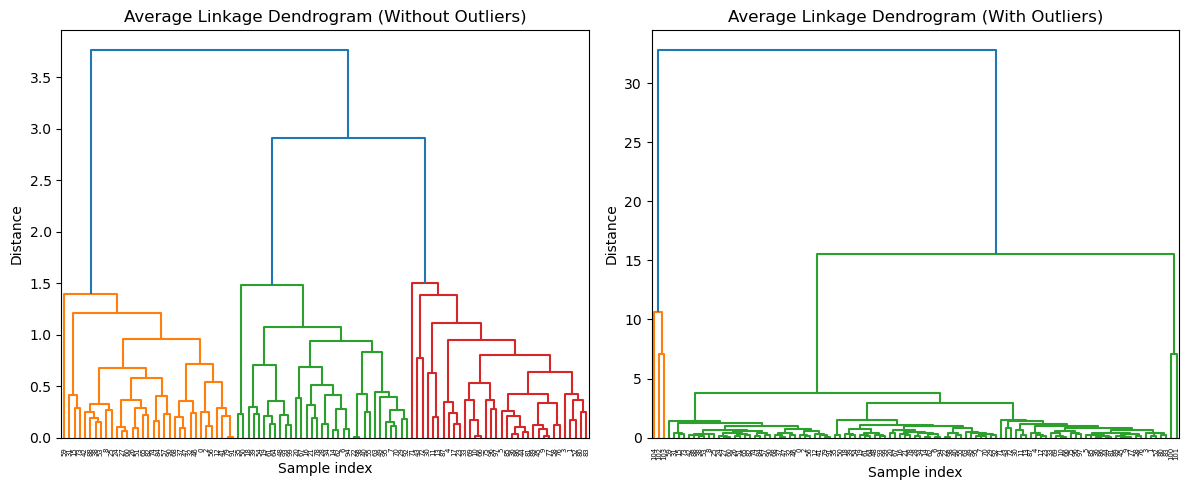

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate Gaussian distributed data (blobs)
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.5, random_state=0)

# Plot the original blobs data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Original Gaussian Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add outliers to the data
outliers = np.array([[10, 10], [15, 15], [20, 20], [25, 25], [30, 30]])
X_with_outliers = np.vstack([X, outliers])

# Plot the data with outliers
plt.subplot(1, 2, 2)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red
plt.title('Data with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Perform average linkage hierarchical clustering without outliers
Z_without_outliers = linkage(X, method='average')

# Perform average linkage hierarchical clustering with outliers
Z_with_outliers = linkage(X_with_outliers, method='average')

# Plot dendrograms
plt.figure(figsize=(12, 5))

# Dendrogram without outliers
plt.subplot(1, 2, 1)
dendrogram(Z_without_outliers)
plt.title('Average Linkage Dendrogram (Without Outliers)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Dendrogram with outliers
plt.subplot(1, 2, 2)
dendrogram(Z_with_outliers)
plt.title('Average Linkage Dendrogram (With Outliers)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [18]:
# ward 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons, make_circles, make_blobs

# Function to generate synthetic data
def generate_data(data_type, n_samples=1000, noise=0.1):
    if data_type == 'moons':
        return make_moons(n_samples=n_samples, noise=noise, random_state=42)
    elif data_type == 'circles':
        return make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    elif data_type == 'blobs':
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=0.5, random_state=42)
    else:
        raise ValueError("Unsupported data type. Choose from 'moons', 'circles', or 'blobs'.")

# Function to add random noise to the data
def add_random_noise(X, noise_level=0.1):
    noise = np.random.normal(loc=0, scale=noise_level, size=X.shape)
    return X + noise

# Function to perform hierarchical clustering and plot dendrograms
def plot_dendrograms(X, linkage_method, with_outliers=False):
    title_suffix = 'With Outliers' if with_outliers else 'Without Outliers'
    
    # Perform hierarchical clustering
    Z = linkage(X, method=linkage_method)
    
    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
    if with_outliers:
        outliers = X[-5:]
        plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red
    plt.title(f'Data {title_suffix}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.subplot(1, 2, 2)
    dendrogram(Z)
    plt.title(f'{linkage_method.capitalize()} Linkage Dendrogram {title_suffix}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')

    plt.tight_layout()
    plt.show()

# Generate and plot data without and with outliers for a given linkage method
def demonstrate_clustering(data_type, linkage_method, noise_level=0.1):
    # Generate data
    X, _ = generate_data(data_type)
    X_noisy = add_random_noise(X, noise_level)
    
    # Plot without outliers
    plot_dendrograms(X_noisy, linkage_method, with_outliers=False)
    
    # Add outliers
    outliers = np.array([[10, 10], [15, 15], [20, 20], [25, 25], [30, 30]])
    X_with_outliers = np.vstack([X_noisy, outliers])
    
    # Plot with outliers
    plot_dendrograms(X_with_outliers, linkage_method, with_outliers=True)



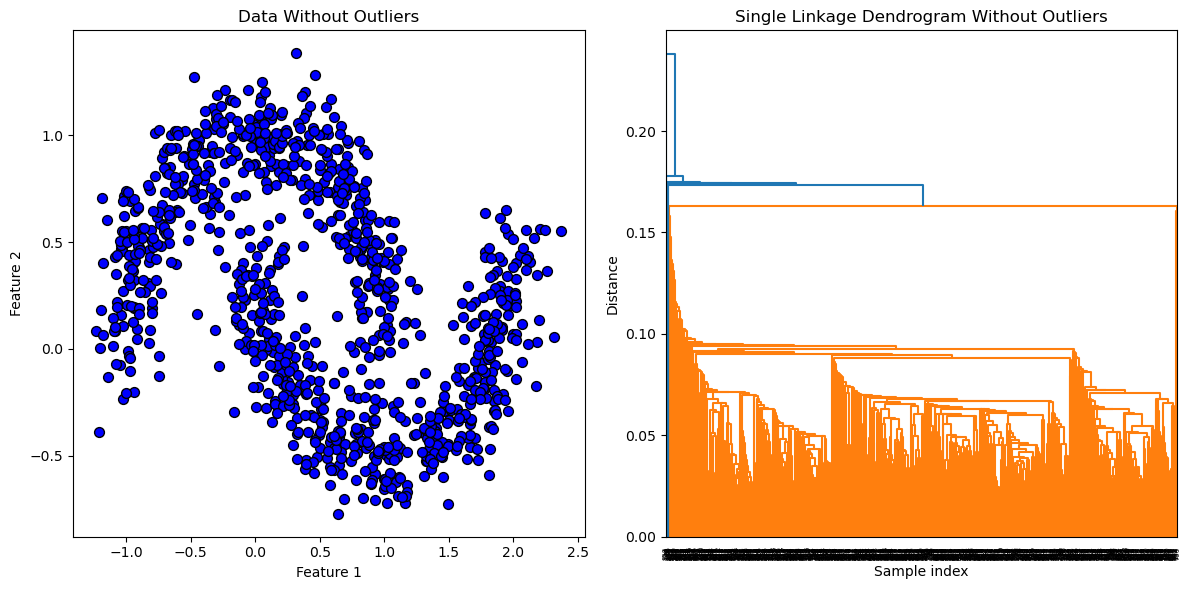

C:\Users\Upendra\AppData\Local\Temp\ipykernel_29044\2172941397.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100) # Mark outliers in red


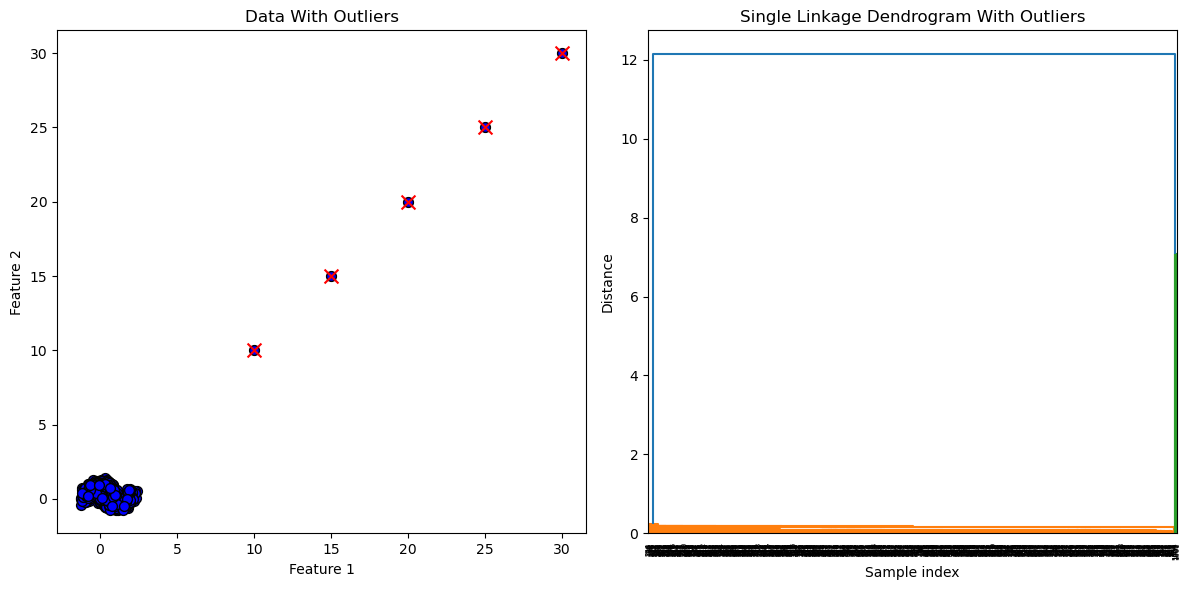

In [38]:
# Example usage
demonstrate_clustering('moons', 'single')


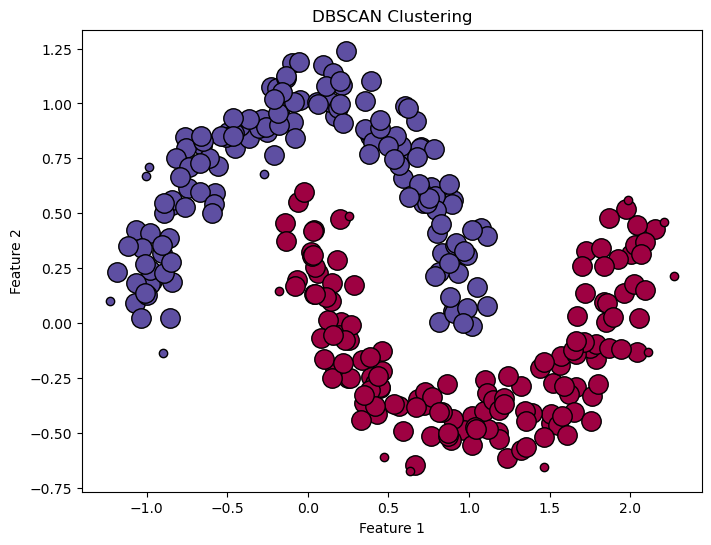

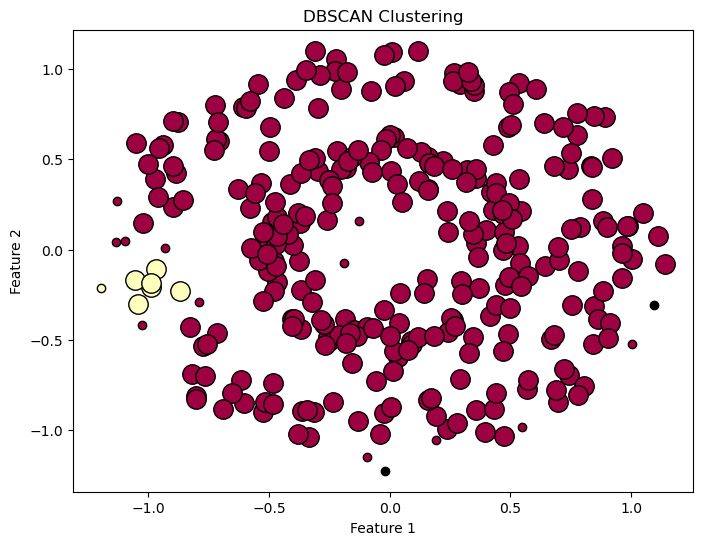

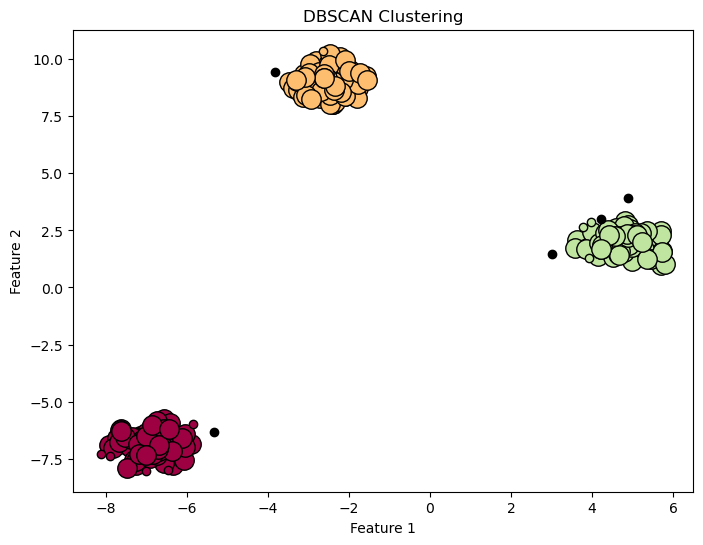

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_circles, make_blobs

# Function to generate synthetic data
def generate_data(data_type, n_samples=100, noise=0.1):
    if data_type == 'moons':
        return make_moons(n_samples=n_samples, noise=noise, random_state=42)
    elif data_type == 'circles':
        return make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    elif data_type == 'blobs':
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=0.5, random_state=42)
    else:
        raise ValueError("Unsupported data type. Choose from 'moons', 'circles', or 'blobs'.")

# Function to plot DBSCAN clustering results
def plot_dbscan(X, eps, min_samples):
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Identify core samples and noise
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(labels)

    # Plot the results
    plt.figure(figsize=(8, 6))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = 'k'
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example usage
X_moons, _ = generate_data('moons', n_samples=300, noise=0.1)
plot_dbscan(X_moons, eps=0.2, min_samples=5)

X_circles, _ = generate_data('circles', n_samples=300, noise=0.1)
plot_dbscan(X_circles, eps=0.2, min_samples=5)

X_blobs, _ = generate_data('blobs', n_samples=300, noise=0.1)
plot_dbscan(X_blobs, eps=0.5, min_samples=5)


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.datasets import make_moons, make_circles, make_blobs, make_classification

# Function to generate synthetic data
def generate_data(data_type, n_samples=500, noise=0.1):
    if data_type == 'moons':
        return make_moons(n_samples=n_samples, noise=noise, random_state=42)
    elif data_type == 'circles':
        return make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    elif data_type == 'blobs':
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=0.5, random_state=42)
    elif data_type == 'classification':
        return make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
    else:
        raise ValueError("Unsupported data type. Choose from 'moons', 'circles', 'blobs', 'classification'.")

# Function to plot data before and after clustering
def plot_clustering(X, linkage_method):
    # Perform hierarchical clustering
    Z = linkage(X, method=linkage_method)
    labels = fcluster(Z, t=3, criterion='maxclust')  # Adjust t as needed for the number of clusters

    # Plot original data
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
    plt.title('Original Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot clustered data
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'{linkage_method.capitalize()} Linkage Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

# Example usage with six different data types and various linkage methods
data_types = ['moons', 'circles', 'blobs', 'classification']
linkage_methods = ['single', 'complete', 'average', 'ward']




Data type: moons, Linkage method: single


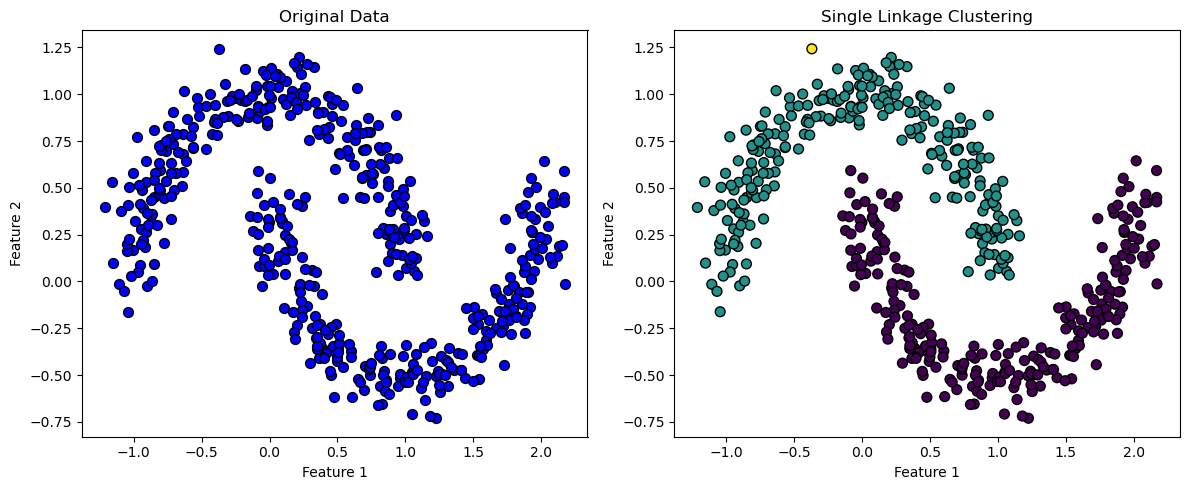

Data type: circles, Linkage method: single


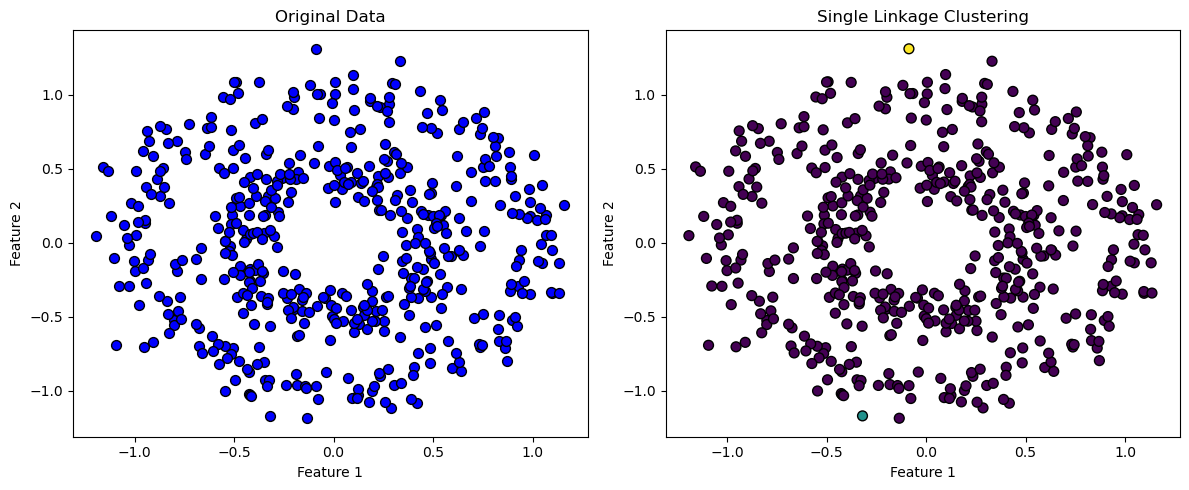

Data type: blobs, Linkage method: single


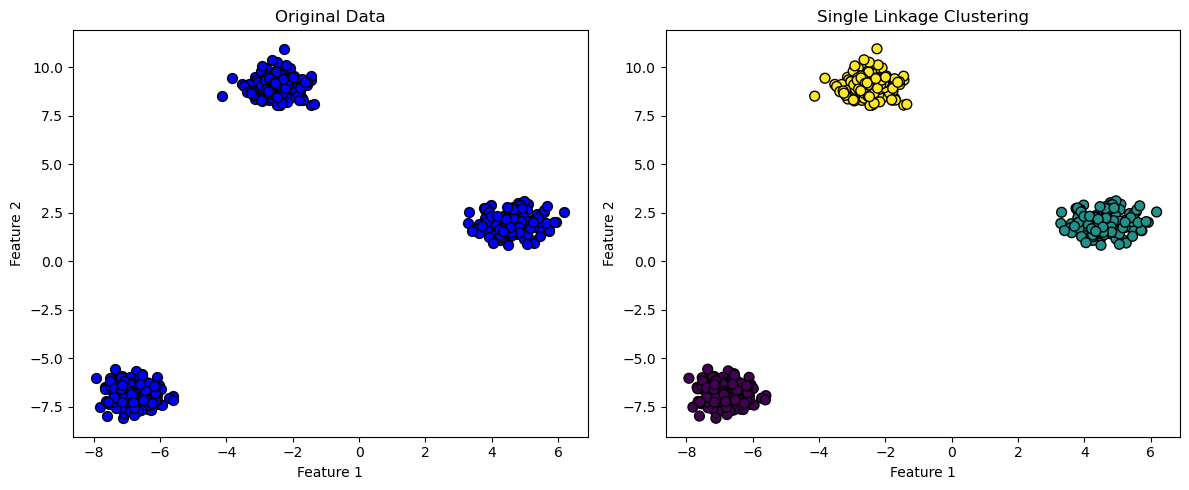

Data type: classification, Linkage method: single


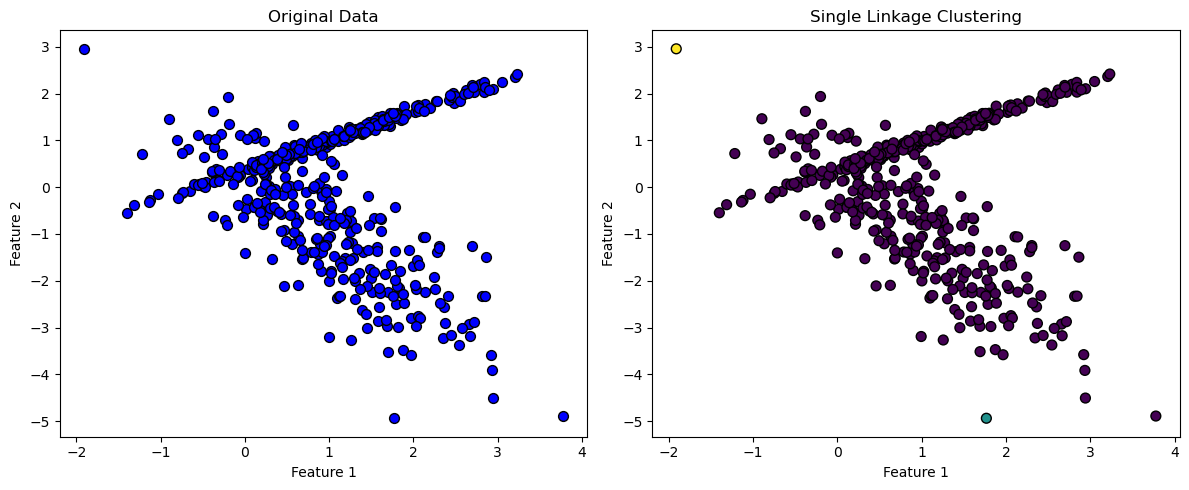

In [46]:
for data_type in data_types:
    X, _ = generate_data(data_type)
    print(f'Data type: {data_type}, Linkage method: {'single'}')
    plot_clustering(X, 'single')

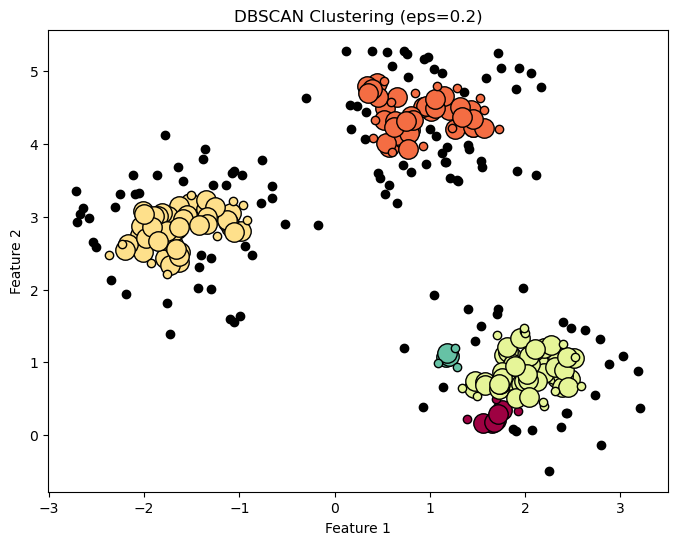

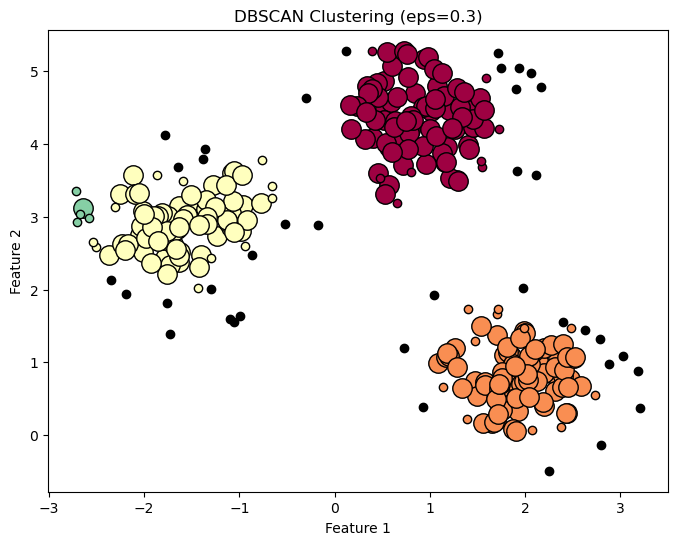

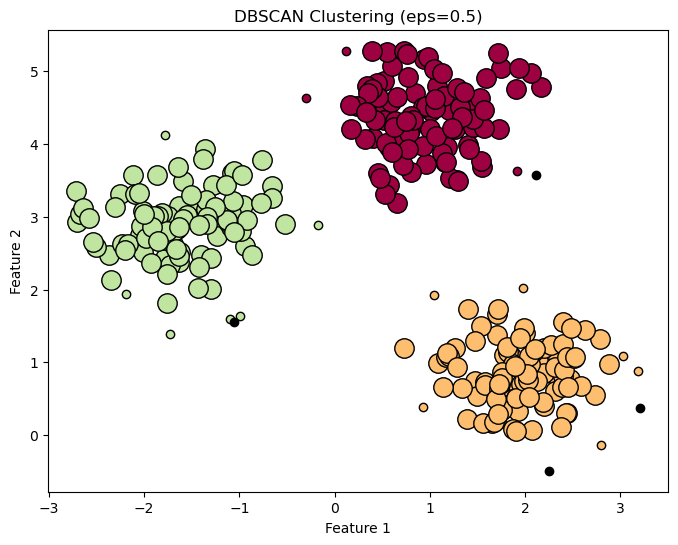

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)

# Function to plot DBSCAN clustering results
def plot_dbscan(X, eps, min_samples):
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Identify core samples and noise
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(labels)

    # Plot the results
    plt.figure(figsize=(8, 6))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = 'k'
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    plt.title(f'DBSCAN Clustering (eps={eps})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot DBSCAN results with different epsilon values
plot_dbscan(X, eps=0.2, min_samples=5)
plot_dbscan(X, eps=0.3, min_samples=5)
plot_dbscan(X, eps=0.5, min_samples=5)


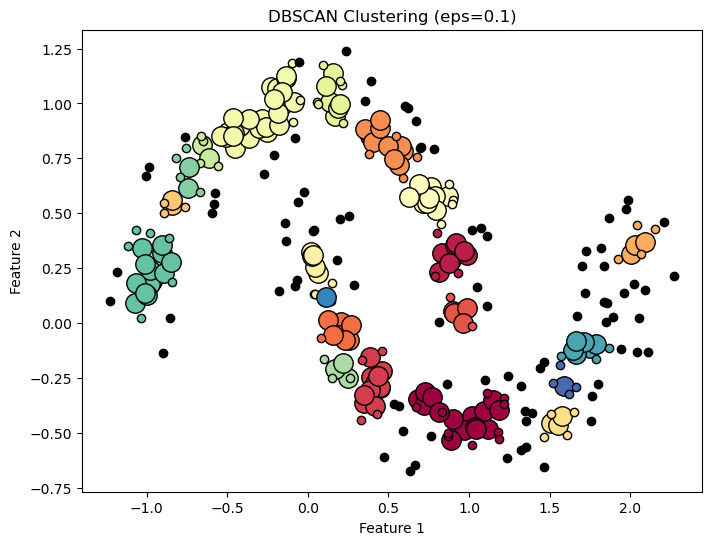

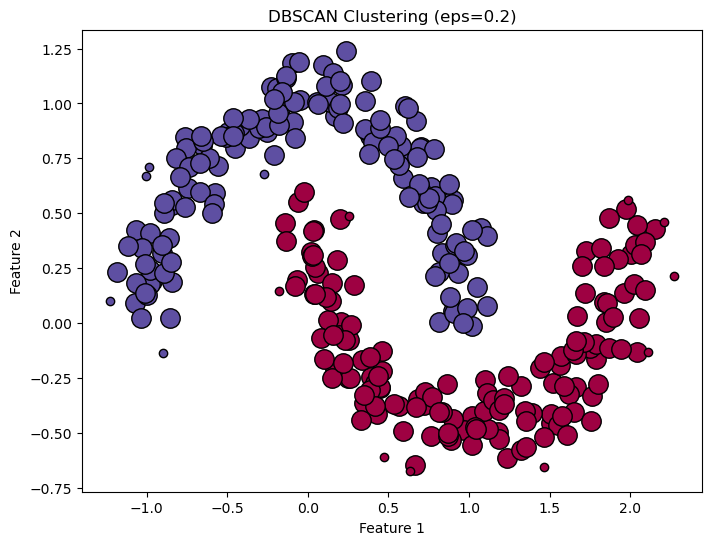

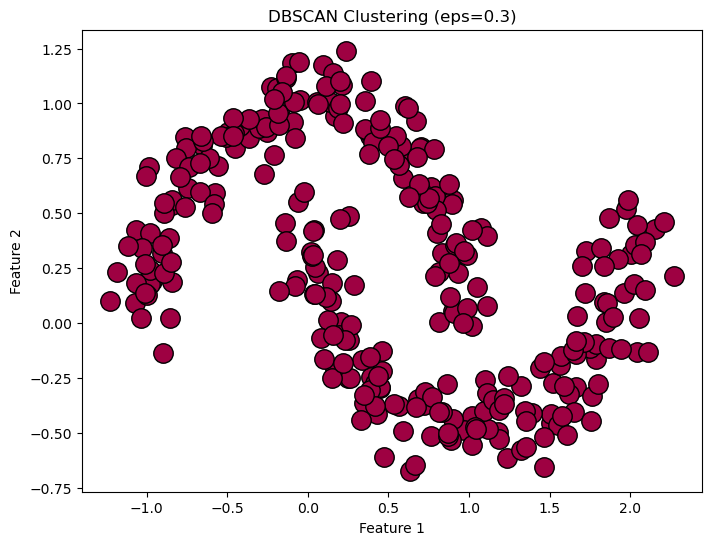

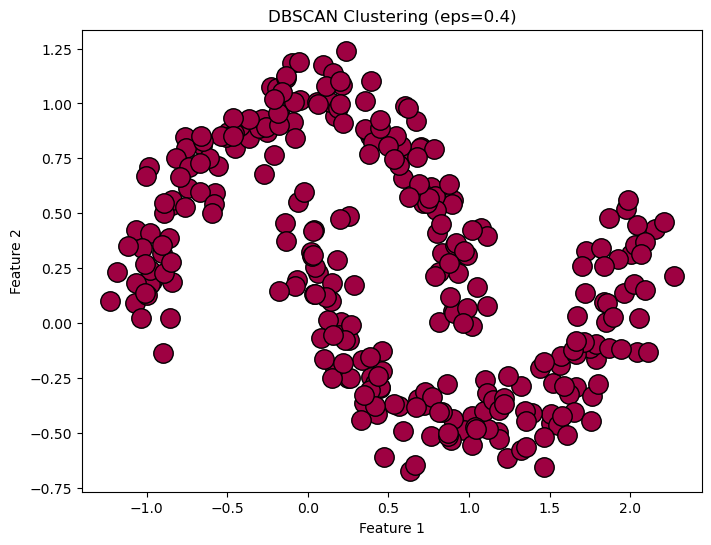

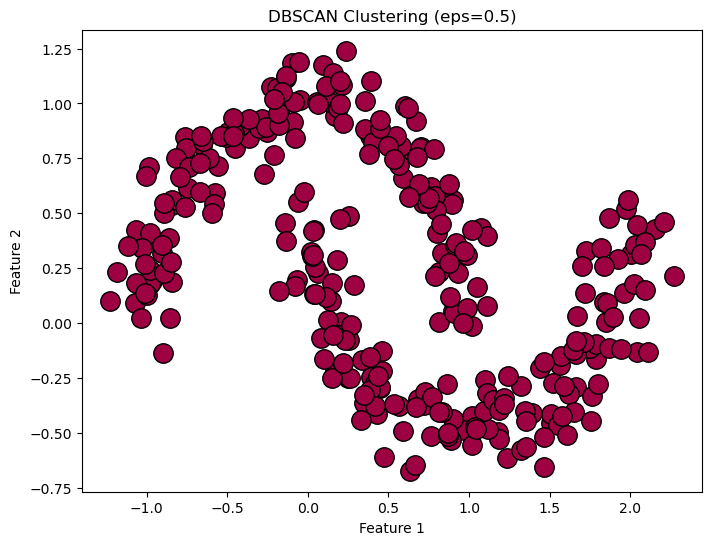

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate synthetic "moons" data
np.random.seed(42)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Function to plot DBSCAN clustering results
def plot_dbscan(X, eps, min_samples):
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Identify core samples and noise
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(labels)

    # Plot the results
    plt.figure(figsize=(8, 6))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = 'k'
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    plt.title(f'DBSCAN Clustering (eps={eps})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot DBSCAN results with different epsilon values for "moons" dataset
plot_dbscan(X, eps=0.1, min_samples=5)
plot_dbscan(X, eps=0.2, min_samples=5)
plot_dbscan(X, eps=0.3, min_samples=5)
plot_dbscan(X, eps=0.4, min_samples=5)
plot_dbscan(X, eps=0.5, min_samples=5)
